<a href="https://colab.research.google.com/github/anmolgulati10/image-augumentation-on-cats-dog-dataset/blob/master/dog_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anmolgulati10","key":"4afd3de52799fe2b03f5c82b01e6ced0"}'}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d tongpython/cat-and-dog

 94% 204M/217M [00:02<00:00, 59.7MB/s]
100% 217M/217M [00:02<00:00, 89.9MB/s]


In [0]:
!unzip /content/cat-and-dog.zip

Archive:  /content/cat-and-dog.zip
  inflating: training_set.zip        
  inflating: test_set.zip            


In [0]:
!unzip /content/training_set.zip

Archive:  /content/training_set.zip
   creating: training_set/
   creating: training_set/cats/
  inflating: training_set/cats/_DS_Store  
  inflating: training_set/cats/cat.1.jpg  
  inflating: training_set/cats/cat.10.jpg  
  inflating: training_set/cats/cat.100.jpg  
  inflating: training_set/cats/cat.1000.jpg  
  inflating: training_set/cats/cat.1001.jpg  
  inflating: training_set/cats/cat.1002.jpg  
  inflating: training_set/cats/cat.1003.jpg  
  inflating: training_set/cats/cat.1004.jpg  
  inflating: training_set/cats/cat.1005.jpg  
  inflating: training_set/cats/cat.1006.jpg  
  inflating: training_set/cats/cat.1007.jpg  
  inflating: training_set/cats/cat.1008.jpg  
  inflating: training_set/cats/cat.1009.jpg  
  inflating: training_set/cats/cat.101.jpg  
  inflating: training_set/cats/cat.1010.jpg  
  inflating: training_set/cats/cat.1011.jpg  
  inflating: training_set/cats/cat.1012.jpg  
  inflating: training_set/cats/cat.1013.jpg  
  inflating: training_set/cats/cat.1014.j

In [0]:
!unzip /content/test_set.zip

Archive:  /content/test_set.zip
   creating: test_set/
   creating: test_set/cats/
  inflating: test_set/cats/_DS_Store  
  inflating: test_set/cats/cat.4001.jpg  
  inflating: test_set/cats/cat.4002.jpg  
  inflating: test_set/cats/cat.4003.jpg  
  inflating: test_set/cats/cat.4004.jpg  
  inflating: test_set/cats/cat.4005.jpg  
  inflating: test_set/cats/cat.4006.jpg  
  inflating: test_set/cats/cat.4007.jpg  
  inflating: test_set/cats/cat.4008.jpg  
  inflating: test_set/cats/cat.4009.jpg  
  inflating: test_set/cats/cat.4010.jpg  
  inflating: test_set/cats/cat.4011.jpg  
  inflating: test_set/cats/cat.4012.jpg  
  inflating: test_set/cats/cat.4013.jpg  
  inflating: test_set/cats/cat.4014.jpg  
  inflating: test_set/cats/cat.4015.jpg  
  inflating: test_set/cats/cat.4016.jpg  
  inflating: test_set/cats/cat.4017.jpg  
  inflating: test_set/cats/cat.4018.jpg  
  inflating: test_set/cats/cat.4019.jpg  
  inflating: test_set/cats/cat.4020.jpg  
  inflating: test_set/cats/cat.4021.jp

In [0]:
import os
from matplotlib.image import imread
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


In [0]:
dict={'dog':0,'cat':1}

In [0]:
dict['dog']

0

In [0]:
x_train=[]
y_train=[]
for cat in os.listdir('/content/training_set/cats'):
  if cat=='_DS_Store':
    continue
  else:
    img=image.load_img(f'/content/training_set/cats/{cat}',target_size=(100,100))
    x_train.append((image.img_to_array(img))/255.0)
    y_train.append(dict['cat'])
for dog in os.listdir('/content/training_set/dogs'):
  if dog=='_DS_Store':
    continue
  else:
    img=image.load_img(f'/content/training_set/dogs/{dog}',target_size=(100,100))
    x_train.append((image.img_to_array(img))/255.0)
    y_train.append(dict['dog'])

In [0]:
x_test=[]
y_test=[]
for cat in os.listdir('/content/test_set/cats'):
  if cat=='_DS_Store':
    continue
  else:
    img=image.load_img(f'/content/test_set/cats/{cat}',target_size=(100,100))
    x_test.append((image.img_to_array(img))/255.0)
    y_test.append(dict['cat'])
for dog in os.listdir('/content/test_set/dogs'):
  if dog=='_DS_Store':
    continue
  else:
    img=image.load_img(f'/content/test_set/dogs/{dog}',target_size=(100,100))
    x_test.append((image.img_to_array(img))/255.0)
    y_test.append(dict['dog'])

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8005, 100, 100, 3)
(8005,)
(2023, 100, 100, 3)
(2023,)


In [0]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(8005, 100, 100, 3)
(8005,)


In [0]:
import matplotlib.pyplot as plt

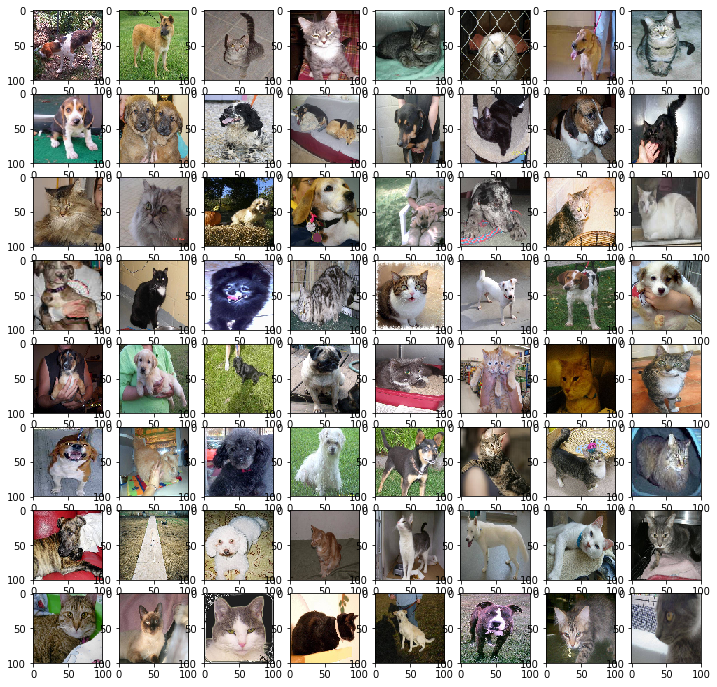

In [0]:
fig=plt.figure(figsize=(12,12))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(x_train[i])
plt.show()

In [0]:
import keras

In [0]:
from keras.models import Sequential

In [0]:
model=Sequential()

In [0]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [0]:
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 input_shape=(100,100,3),
                 activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2),
                       padding='SAME',
                       ))

In [0]:
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2),
                       padding='SAME',
                       ))

In [0]:
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='SAME',
                 activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2),
                       padding='SAME',
                       ))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(units=128,
                activation='relu',
                ))

In [0]:
model.add(Dropout(rate=0.5))

In [0]:
model.add(Dense(units=128,
                activation='relu',
                ))

In [0]:
model.add(Dropout(rate=0.5))

In [0]:
model.add(Dense(units=1,
                activation='sigmoid'
                ))

In [0]:
from keras.optimizers import Adam

In [0]:
adam=Adam(lr=.001)

In [0]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [0]:
datagen = image.ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
datagen.fit(x_train)

In [0]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train)/32, epochs=60)

Epoch 1/60
251/250 [==============================] - 17s 66ms/step - loss: 0.6933 - acc: 0.5161
Epoch 2/60
251/250 [==============================] - 15s 61ms/step - loss: 0.6844 - acc: 0.5401
Epoch 3/60
251/250 [==============================] - 15s 60ms/step - loss: 0.6881 - acc: 0.5429
Epoch 4/60
251/250 [==============================] - 15s 60ms/step - loss: 0.6856 - acc: 0.5593
Epoch 5/60
251/250 [==============================] - 16s 63ms/step - loss: 0.6701 - acc: 0.5864
Epoch 6/60
251/250 [==============================] - 15s 62ms/step - loss: 0.6578 - acc: 0.6159
Epoch 7/60
251/250 [==============================] - 16s 63ms/step - loss: 0.6461 - acc: 0.6261
Epoch 8/60
251/250 [==============================] - 16s 62ms/step - loss: 0.6314 - acc: 0.6405
Epoch 9/60
251/250 [==============================] - 15s 61ms/step - loss: 0.6185 - acc: 0.6560
Epoch 10/60
251/250 [==============================] - 15s 60ms/step - loss: 0.6052 - acc: 0.6743
Epoch 11/60
251/250 [========

In [0]:
model.evaluate(x_test,y_test)[1]

2023/2023 [==============================] - 1s 331us/step


0.8625803262481463